In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
pd.options.display.max_rows=1000

# Load the dataset

In [2]:
park_data = pd.read_csv("Data-Parkinsons.csv")

# Eye-ball raw data to get a feel of the data

In [3]:
park_data.head()


# Number of records are 195
# Number of attributes are 23
# Type of attributes are float 64 and int64

# Main challenge is that scale is not the same in the data 

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
park_data.shape

# Data set has total 195 rows and 24 columns

(195, 24)

In [5]:
park_data.status.value_counts()

# Out of 195 total people 147 people are affected with PD

1    147
0     48
Name: status, dtype: int64

In [6]:
park_data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [7]:
park_data.dtypes

# All the features are float64 except the target variable i.e. "status"

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [8]:
park_data.describe().transpose()

# Central value is the median value

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [9]:
park_data.rename(columns={'MDVP:Fo(Hz)': 'MDVP-Fo(Hz)', 'MDVP:Fhi(Hz)': 'MDVP-Fhi(Hz)','MDVP:Flo(Hz)': 'MDVP-Flo(Hz)', 'MDVP:Jitter(%)': 'MDVP-Jitter(%)', 'MDVP:Jitter(Abs)': 'MDVP-Jitter(Abs)', 'MDVP:RAP': 'MDVP-RAP', 'MDVP:PPQ': 'MDVP-PPQ', 'Jitter:DDP':'Jitter-DDP', 'MDVP:Shimmer':'MDVP-Shimmer','MDVP:Shimmer(dB)':'MDVP-Shimmer(dB)','Shimmer:APQ3':'Shimmer-APQ3','Shimmer:APQ5':'Shimmer-APQ5','MDVP:APQ':'MDVP-APQ','Shimmer:DDA':'Shimmer-DDA'}, inplace=True)

In [10]:
# Dropping unnecessary features
park_data.drop('name', axis = 1, inplace = True)

In [11]:
park_data.head()

# It looks like features in the data need scaling 

,MDVP-Fo(Hz),MDVP-Fhi(Hz),MDVP-Flo(Hz),MDVP-Jitter(%),MDVP-Jitter(Abs),MDVP-RAP,MDVP-PPQ,Jitter-DDP,MDVP-Shimmer,MDVP-Shimmer(dB),...,Shimmer-DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


# Using univariate & bivariate analysis to check the individual attributes for their basic statistics such as central values, spread, tails, relationships between variables etc. mention your observations 

In [12]:
# Most of the independent features are positively skewed that is median is smaller than the mean.
# Maximum data is right tailed
# Spread of the data is a bit un-even

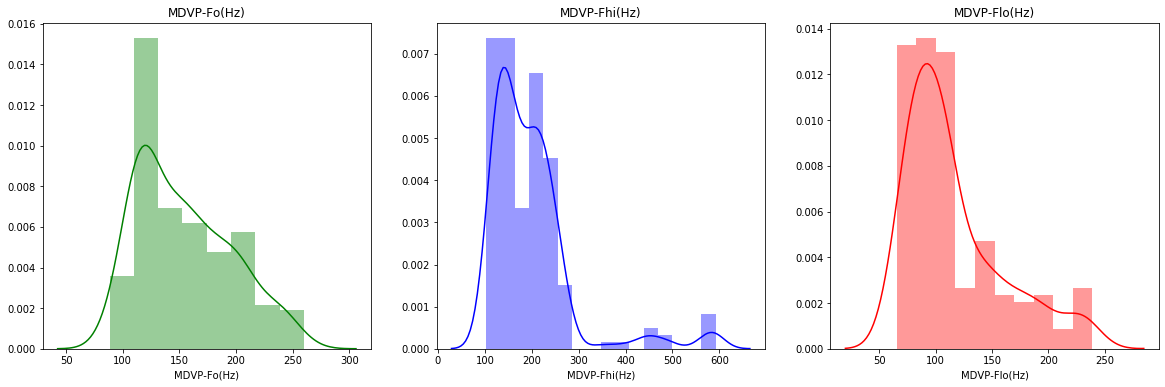

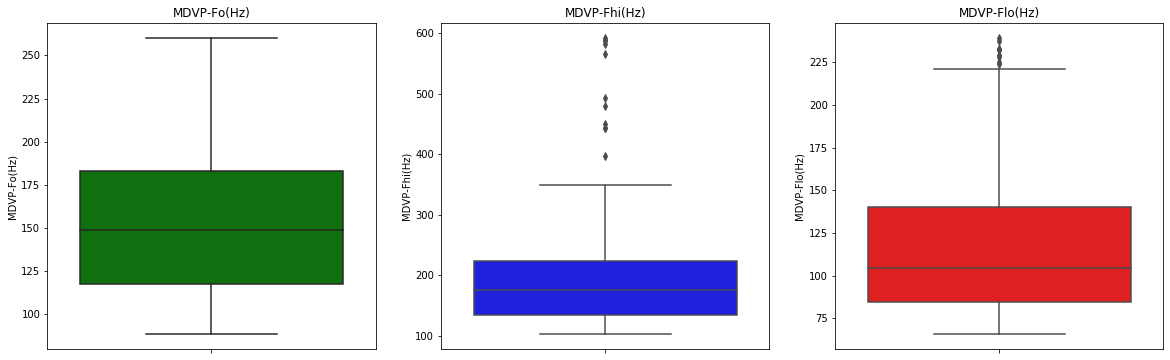

In [13]:
plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
plt.title('MDVP-Fo(Hz)')
sns.distplot(park_data['MDVP-Fo(Hz)'],color='green')

# subplot 2
plt.subplot(1, 3, 2)
plt.title('MDVP-Fhi(Hz)')
sns.distplot(park_data['MDVP-Fhi(Hz)'],color='blue')

# subplot 3l
plt.subplot(1, 3, 3)
plt.title('MDVP-Flo(Hz)')
sns.distplot(park_data['MDVP-Flo(Hz)'],color='red')

plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
plt.title('MDVP-Fo(Hz)')
sns.boxplot(park_data['MDVP-Fo(Hz)'],orient='vertical',color='green')

# subplot 2
plt.subplot(1, 3, 2)
plt.title('MDVP-Fhi(Hz)')
sns.boxplot(park_data['MDVP-Fhi(Hz)'],orient='vertical',color='blue')

# subplot 3
plt.subplot(1, 3, 3)
plt.title('MDVP-Flo(Hz)')
sns.boxplot(park_data['MDVP-Flo(Hz)'],orient='vertical',color='red')


plt.show()


 

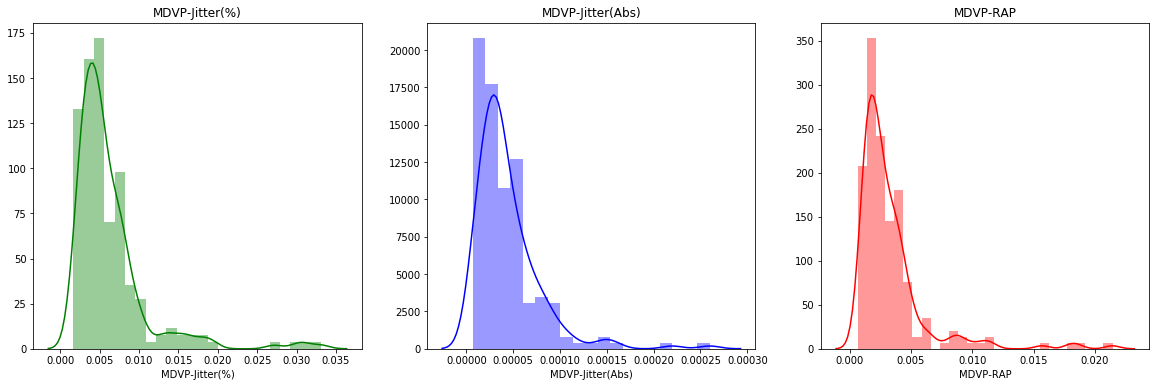

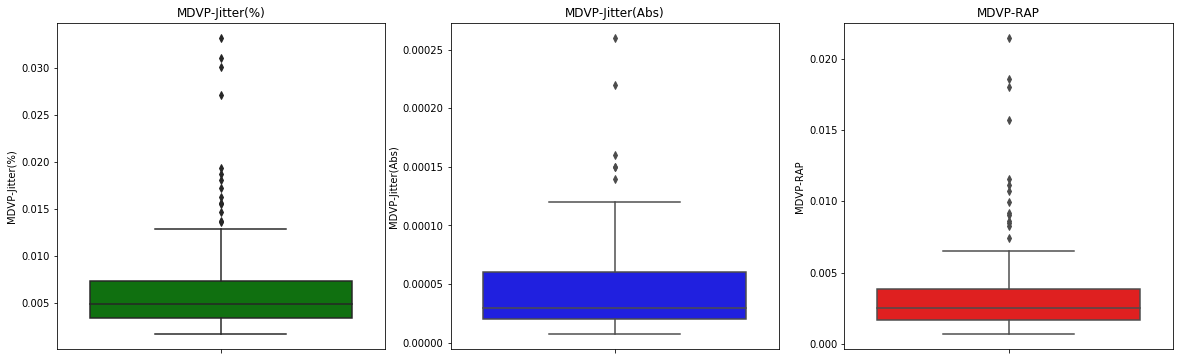

In [14]:
plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
plt.title('MDVP-Jitter(%)')
sns.distplot(park_data['MDVP-Jitter(%)'],color='green')

# subplot 2
plt.subplot(1, 3, 2)
plt.title('MDVP-Jitter(Abs)')
sns.distplot(park_data['MDVP-Jitter(Abs)'],color='blue')

# subplot 3l
plt.subplot(1, 3, 3)
plt.title('MDVP-RAP')
sns.distplot(park_data['MDVP-RAP'],color='red')

plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
plt.title('MDVP-Jitter(%)')
sns.boxplot(park_data['MDVP-Jitter(%)'],orient='vertical',color='green')

# subplot 2
plt.subplot(1, 3, 2)
plt.title('MDVP-Jitter(Abs)')
sns.boxplot(park_data['MDVP-Jitter(Abs)'],orient='vertical',color='blue')

# subplot 3
plt.subplot(1, 3, 3)
plt.title('MDVP-RAP')
sns.boxplot(park_data['MDVP-RAP'],orient='vertical',color='red')


plt.show()

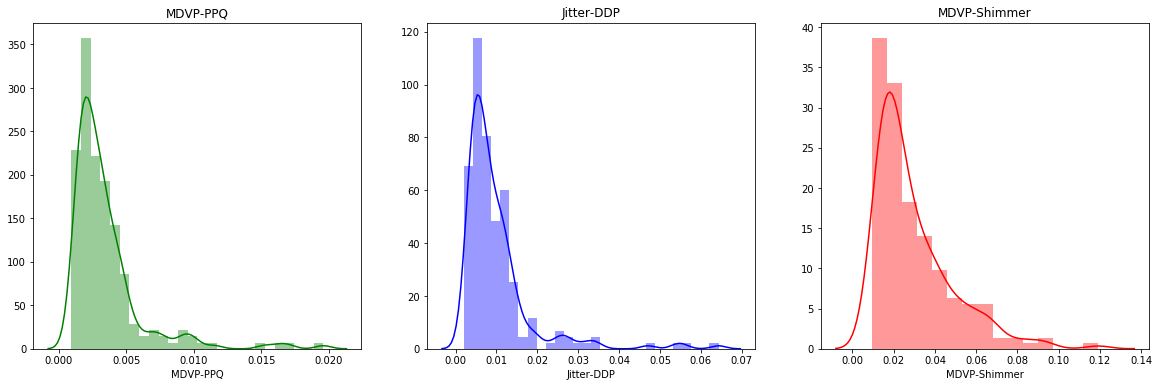

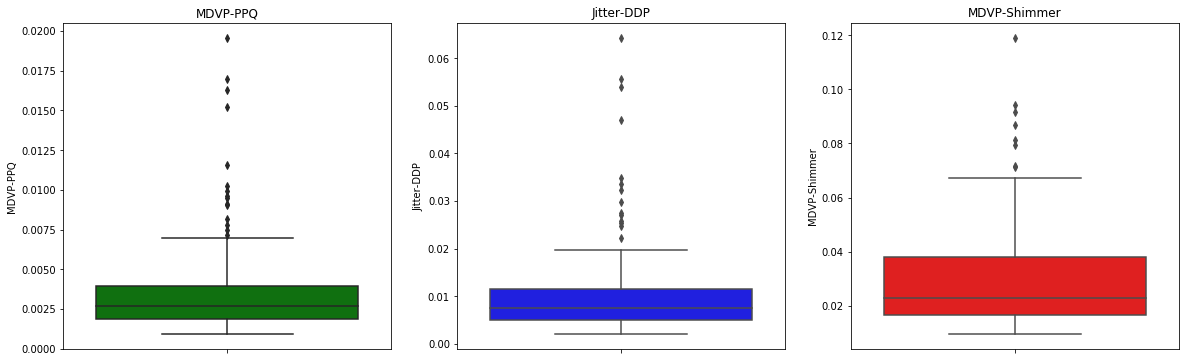

In [15]:
plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
plt.title('MDVP-PPQ')
sns.distplot(park_data['MDVP-PPQ'],color='green')

# subplot 2
plt.subplot(1, 3, 2)
plt.title('Jitter-DDP')
sns.distplot(park_data['Jitter-DDP'],color='blue')

# subplot 3l
plt.subplot(1, 3, 3)
plt.title('MDVP-Shimmer')
sns.distplot(park_data['MDVP-Shimmer'],color='red')

plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
plt.title('MDVP-PPQ')
sns.boxplot(park_data['MDVP-PPQ'],orient='vertical',color='green')

# subplot 2
plt.subplot(1, 3, 2)
plt.title('Jitter-DDP')
sns.boxplot(park_data['Jitter-DDP'],orient='vertical',color='blue')

# subplot 3
plt.subplot(1, 3, 3)
plt.title('MDVP-Shimmer')
sns.boxplot(park_data['MDVP-Shimmer'],orient='vertical',color='red')


plt.show()

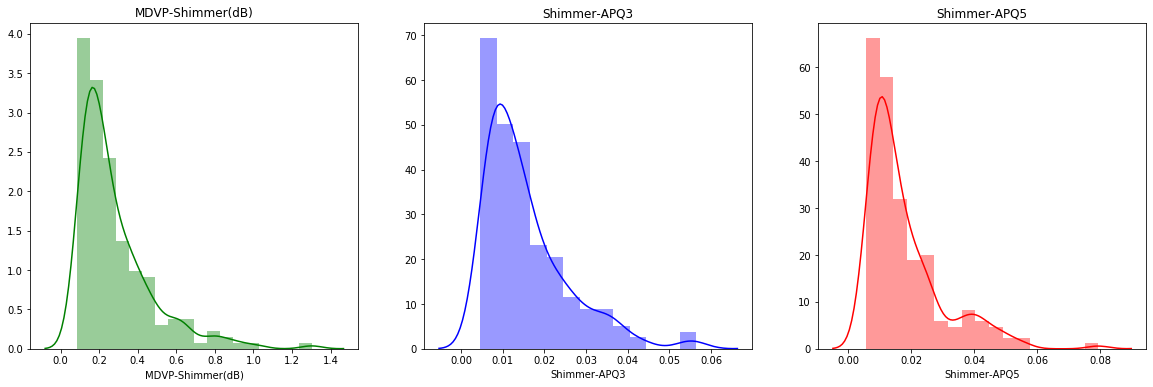

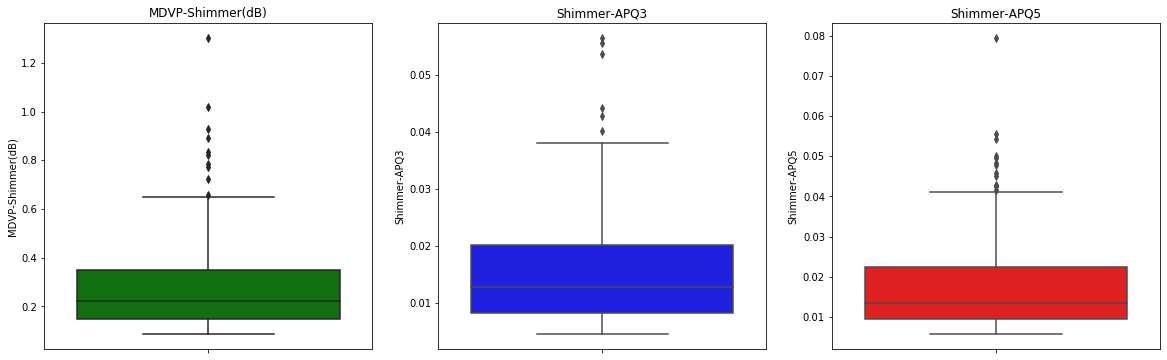

In [16]:
plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
plt.title('MDVP-Shimmer(dB)')
sns.distplot(park_data['MDVP-Shimmer(dB)'],color='green')

# subplot 2
plt.subplot(1, 3, 2)
plt.title('Shimmer-APQ3')
sns.distplot(park_data['Shimmer-APQ3'],color='blue')

# subplot 3l
plt.subplot(1, 3, 3)
plt.title('Shimmer-APQ5')
sns.distplot(park_data['Shimmer-APQ5'],color='red')

plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
plt.title('MDVP-Shimmer(dB)')
sns.boxplot(park_data['MDVP-Shimmer(dB)'],orient='vertical',color='green')

# subplot 2
plt.subplot(1, 3, 2)
plt.title('Shimmer-APQ3')
sns.boxplot(park_data['Shimmer-APQ3'],orient='vertical',color='blue')

# subplot 3
plt.subplot(1, 3, 3)
plt.title('Shimmer-APQ5')
sns.boxplot(park_data['Shimmer-APQ5'],orient='vertical',color='red')


plt.show()

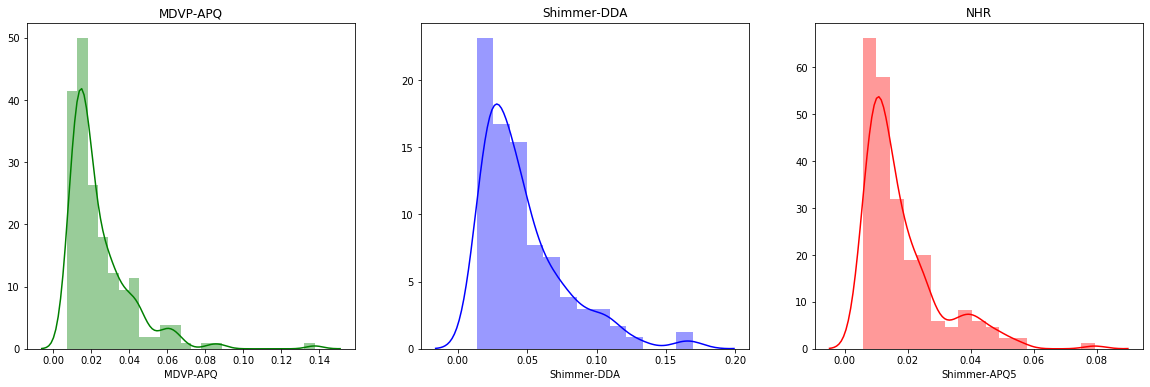

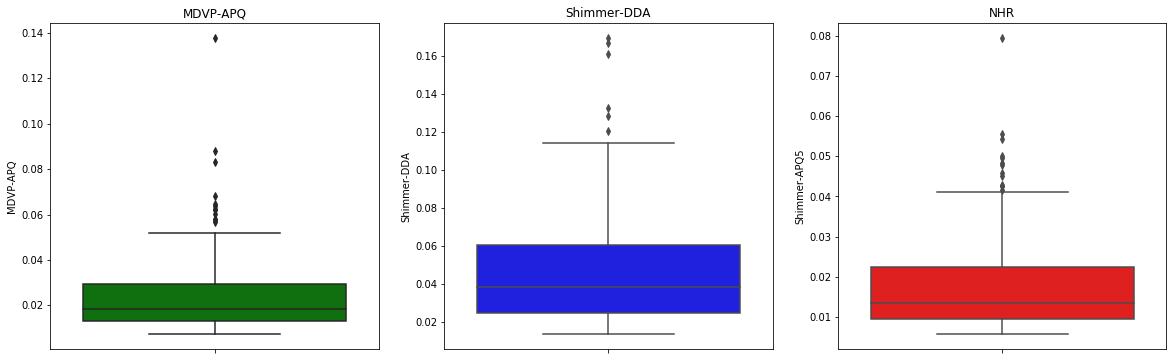

In [17]:
plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
plt.title('MDVP-APQ')
sns.distplot(park_data['MDVP-APQ'],color='green')

# subplot 2
plt.subplot(1, 3, 2)
plt.title('Shimmer-DDA')
sns.distplot(park_data['Shimmer-DDA'],color='blue')

# subplot 3l
plt.subplot(1, 3, 3)
plt.title('NHR')
sns.distplot(park_data['Shimmer-APQ5'],color='red')

plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
plt.title('MDVP-APQ')
sns.boxplot(park_data['MDVP-APQ'],orient='vertical',color='green')

# subplot 2
plt.subplot(1, 3, 2)
plt.title('Shimmer-DDA')
sns.boxplot(park_data['Shimmer-DDA'],orient='vertical',color='blue')

# subplot 3
plt.subplot(1, 3, 3)
plt.title('NHR')
sns.boxplot(park_data['Shimmer-APQ5'],orient='vertical',color='red')


plt.show()

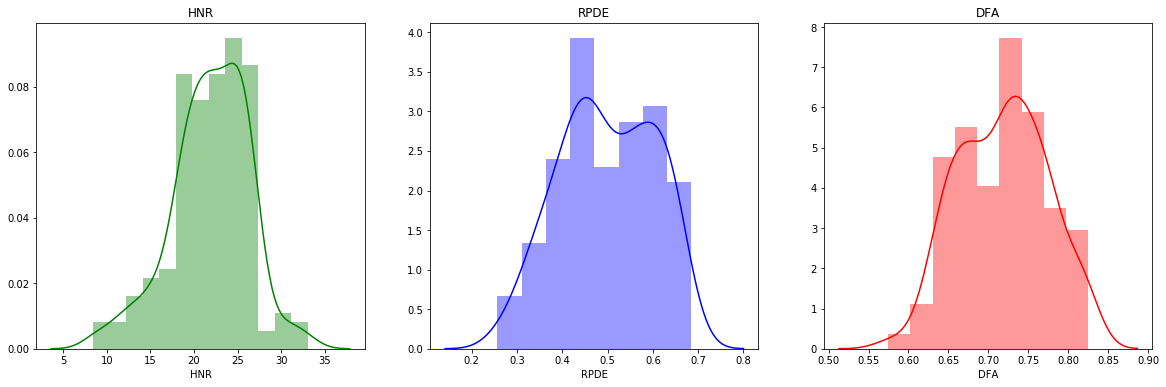

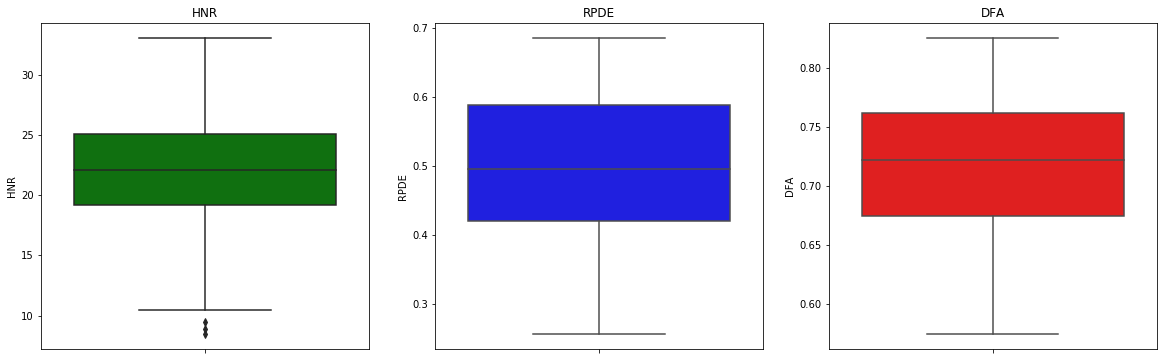

In [18]:
plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
plt.title('HNR')
sns.distplot(park_data['HNR'],color='green')

# subplot 2
plt.subplot(1, 3, 2)
plt.title('RPDE')
sns.distplot(park_data['RPDE'],color='blue')

# subplot 3l
plt.subplot(1, 3, 3)
plt.title('DFA')
sns.distplot(park_data['DFA'],color='red')

plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
plt.title('HNR')
sns.boxplot(park_data['HNR'],orient='vertical',color='green')

# subplot 2
plt.subplot(1, 3, 2)
plt.title('RPDE')
sns.boxplot(park_data['RPDE'],orient='vertical',color='blue')

# subplot 3
plt.subplot(1, 3, 3)
plt.title('DFA')
sns.boxplot(park_data['DFA'],orient='vertical',color='red')


plt.show()

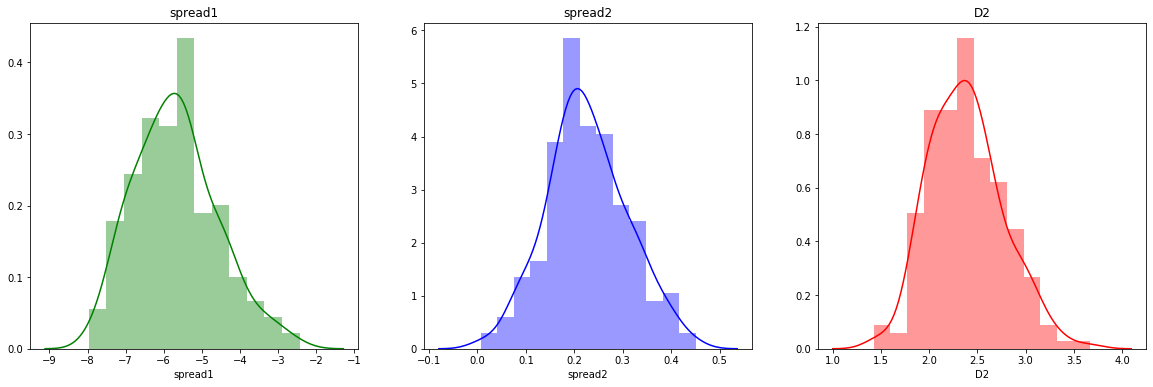

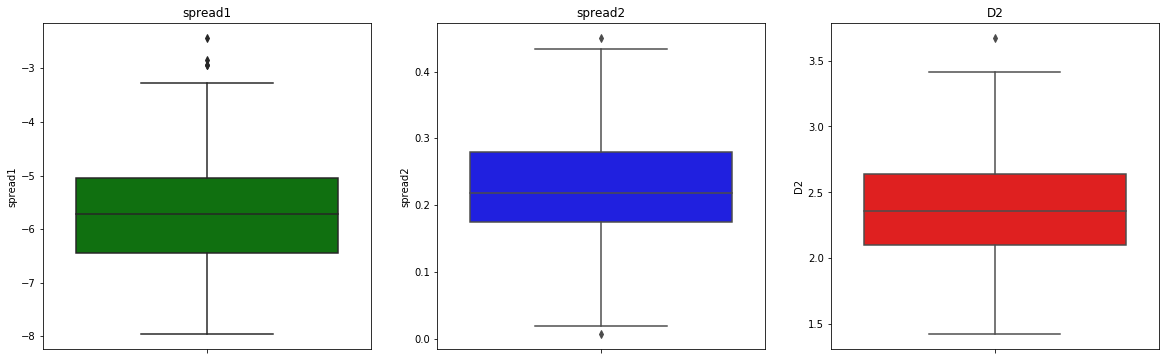

In [19]:
plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
plt.title('spread1')
sns.distplot(park_data['spread1'],color='green')

# subplot 2
plt.subplot(1, 3, 2)
plt.title('spread2')
sns.distplot(park_data['spread2'],color='blue')

# subplot 3l
plt.subplot(1, 3, 3)
plt.title('D2')
sns.distplot(park_data['D2'],color='red')

plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
plt.title('spread1')
sns.boxplot(park_data['spread1'],orient='vertical',color='green')

# subplot 2
plt.subplot(1, 3, 2)
plt.title('spread2')
sns.boxplot(park_data['spread2'],orient='vertical',color='blue')

# subplot 3
plt.subplot(1, 3, 3)
plt.title('D2')
sns.boxplot(park_data['D2'],orient='vertical',color='red')


plt.show()








# Doing  bivariate analysis

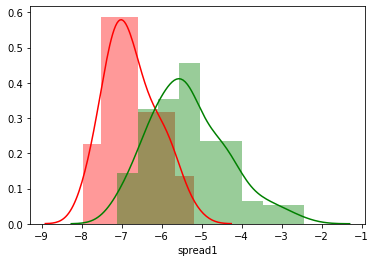

In [20]:
sns.distplot( park_data[park_data.status == 0]['spread1'], color = 'r')
sns.distplot( park_data[park_data.status == 1]['spread1'], color = 'g')

# Spread1 is normally distributed between person who have PD and who is normal. People who have spread1 between - 8.5 and -7.5 are more and they are normal. People whose spread1 is between -6.5 and -5 are having PD

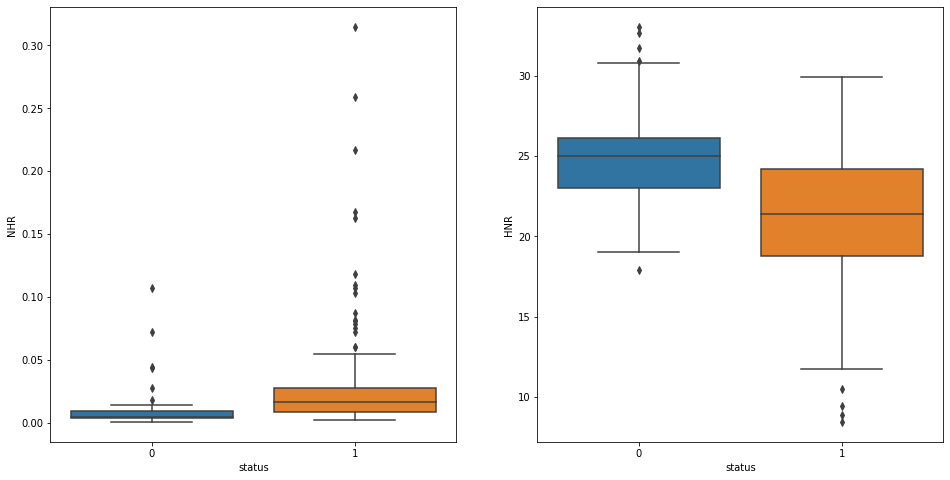

In [21]:
fig, ax = plt.subplots(1,2,figsize=(16,8))
sns.boxplot(x='status',y='NHR',data=park_data,ax=ax[0])
sns.boxplot(x='status',y='HNR',data=park_data,ax=ax[1])



# People who have PD(status equal to one) have higher levels of Noise to Harmonic ratio. Also, looking into the HNR ratio people who have PD have lower levels in the same.

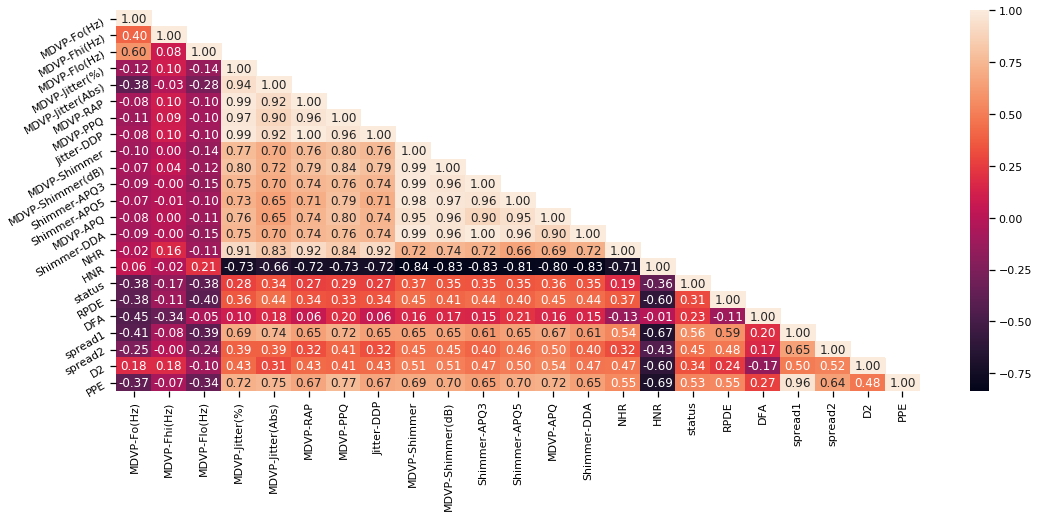

In [22]:
corr = park_data.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 3.5})
plt.figure(figsize=(18,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)


# We can see the correlation heat map below and check corelation among all the features

# Split the dataset into training and test set in the ratio of 70:30 (Training:Test)

In [23]:
X = park_data.drop('status', axis = 1,)
y = park_data['status']
park_data_train_X, park_data_test_X, park_data_train_Y, park_data_test_Y = train_test_split(X, y, test_size = 0.3, random_state = 20)

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Renaming the features name for replacing ":" with "-"
vars = ['MDVP-Fo(Hz)', 'MDVP-Fhi(Hz)', 'MDVP-Flo(Hz)', 'MDVP-Jitter(%)',
       'MDVP-Jitter(Abs)', 'MDVP-RAP', 'MDVP-PPQ', 'Jitter-DDP',
       'MDVP-Shimmer', 'MDVP-Shimmer(dB)', 'Shimmer-APQ3', 'Shimmer-APQ5',
       'MDVP-APQ', 'Shimmer-DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE']


# Prepare the data for training - Scale the data if necessary, get rid of missingvalues (if any) etc

In [25]:
park_data_train_X = pd.DataFrame(scaler.fit_transform(park_data_train_X), columns =park_data_train_X.columns )
park_data_test_X  = pd.DataFrame(scaler.transform(park_data_test_X), columns = park_data_train_X.columns)

park_data.isnull().sum()
# We don't have any missing values in the data

MDVP-Fo(Hz)         0
MDVP-Fhi(Hz)        0
MDVP-Flo(Hz)        0
MDVP-Jitter(%)      0
MDVP-Jitter(Abs)    0
MDVP-RAP            0
MDVP-PPQ            0
Jitter-DDP          0
MDVP-Shimmer        0
MDVP-Shimmer(dB)    0
Shimmer-APQ3        0
Shimmer-APQ5        0
MDVP-APQ            0
Shimmer-DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

# Train at least 3 standard classification algorithms - Logistic Regression, Naive Bayes’, SVM, k-NN etc, and note down their accuracies on the test data

# Logistic Regression

In [26]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(park_data_train_X, park_data_train_Y)
#predict on test
y_predict = model.predict(park_data_test_X)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0        1         2         3         4         5         6  \
0 -1.037606 -0.14765 -0.344443  0.048645  0.205063  0.236258  0.136613   

          7         8         9  ...        13        14        15        16  \
0  0.236297  0.593187  0.482834  ...  0.587173 -0.164124 -0.679986  0.019481   

         17        18        19        20        21  intercept  
0  0.692678  1.671891  1.019058  1.066836  1.347637  -0.586671  

[1 rows x 23 columns]


In [27]:
model_score = model.score(park_data_test_X, park_data_test_Y)
print(model_score)

0.8135593220338984


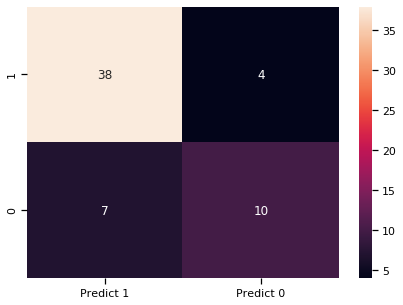

In [28]:
cm=metrics.confusion_matrix(park_data_test_Y, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='d')

# K Nearest Neighbour

In [29]:
#importing libraries
from sklearn.neighbors import KNeighborsClassifier

In [30]:
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )
NNH.fit(park_data_train_X, park_data_train_Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [31]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

predicted_labels = NNH.predict(park_data_test_X)
NNH.score(park_data_test_X, park_data_test_Y)

0.9322033898305084

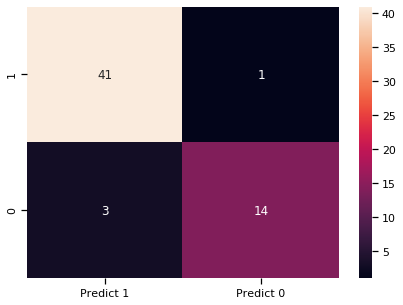

In [32]:
cm=metrics.confusion_matrix(park_data_test_Y, predicted_labels, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='d')

# Naive bayes

In [33]:
#importing necessary libraries
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

# creatw the model
loan_model = GaussianNB()

loan_model.fit(park_data_train_X, park_data_train_Y.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [34]:
test_predict = loan_model.predict(park_data_test_X)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(park_data_test_Y, test_predict)))
print()

Model Accuracy: 0.6441



Confusion Matrix


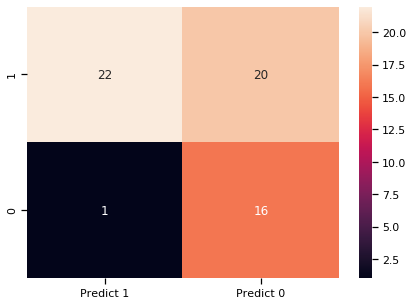

In [35]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(park_data_test_Y, test_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt ='d')

# Train a meta-classifier and note the accuracy on test data

In [36]:
from sklearn.svm import NuSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingCVClassifier
import warnings
warnings.simplefilter('ignore')
from sklearn.metrics import accuracy_score


classifier1 = RandomForestClassifier(random_state=1)
classifier2 = GaussianNB()
classifier3 = KNeighborsClassifier(n_neighbors=1)
classifier4 = LogisticRegression()



# Initializing the StackingCV classifier

sclf = StackingCVClassifier(classifiers=[classifier1, classifier2, classifier3], 
                          meta_classifier=classifier4)

# Create list to store classifiers
classifiers = {"RandomForest": classifier1,
               "Naivebayes": classifier2,
               "KNN": classifier3,
               "LogisticRegression": classifier4,
               "Stack": sclf}


                            
# Train classifiers
for key in classifiers:
    # Get classifier
    classifier = classifiers[key]
    
    # Fit classifier
    classifier.fit(park_data_train_X.values, park_data_train_Y.values)
        
    # Save fitted classifier
    classifiers[key] = classifier
    
# Get results
results = pd.DataFrame()
for key in classifiers:
    # Make prediction on test set
    y_pred = classifiers[key].predict_proba(park_data_test_X)[:,1]
    
    # Save results in pandas dataframe object
    results[f"{key}"] = y_pred
    
y_pred1 = np.where(y_pred > 0.5,1,0)

# Add the test set to the results object
results["Target"] = park_data_test_Y


accuracy = accuracy_score(park_data_test_Y, y_pred1)
print(accuracy)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


0.9152542372881356


In [ ]:
# Stacking classifier model accuracy is 91.5%

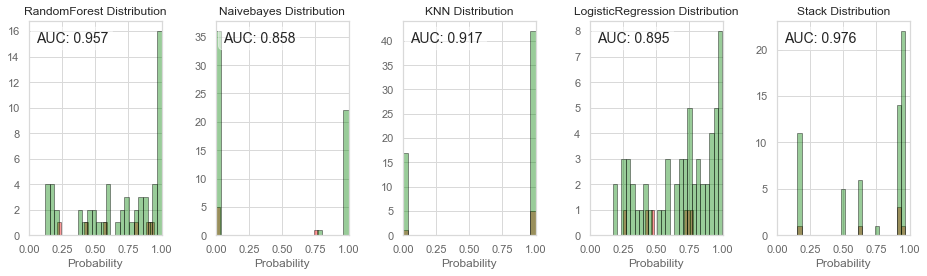

In [37]:
###############################################################################
#                              10. Visualzing results                         #
###############################################################################
# Probability Distributions Figure

# Set graph style
sns.set(font_scale = 1)
sns.set_style({"axes.facecolor": "1.0", "axes.edgecolor": "0.85", "grid.color": "0.85",
               "grid.linestyle": "-", 'axes.labelcolor': '0.4', "xtick.color": "0.4",
               'ytick.color': '0.4'})

# Plot
f, ax = plt.subplots(figsize=(13, 4), nrows=1, ncols = 5)

for key, counter in zip(classifiers, range(5)):
    # Get predictions
    y_pred = results[key]
    
    # Get AUC
    auc = metrics.roc_auc_score(park_data_test_Y, y_pred)
    textstr = f"AUC: {auc:.3f}"

    # Plot false distribution
    false_pred = results[results["Target"] == 0]
    sns.distplot(false_pred[key], hist=True, kde=False, 
                 bins=int(25), color = 'red',
                 hist_kws={'edgecolor':'black'}, ax = ax[counter])
    
    # Plot true distribution
    true_pred = results[results["Target"] == 1]
    sns.distplot(results[key], hist=True, kde=False, 
                 bins=int(25), color = 'green',
                 hist_kws={'edgecolor':'black'}, ax = ax[counter])
    
    
    # These are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    
    # Place a text box in upper left in axes coords
    ax[counter].text(0.05, 0.95, textstr, transform=ax[counter].transAxes, fontsize=14,
                    verticalalignment = "top", bbox=props)
    
    # Set axis limits and labels
    ax[counter].set_title(f"{key} Distribution")
    ax[counter].set_xlim(0,1)
    ax[counter].set_xlabel("Probability")

# Tight layout
plt.tight_layout()

# Save Figure
plt.savefig("Probability Distribution for each Classifier.png", dpi = 1080)

In [38]:
# AUC of the stacked model is the best i.e. 0.976  among all the classifiers so it is petty good

# Train at least one standard Ensemble model - Random forest, Bagging, Boosting etc, and note the accuracy

In [39]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl = rfcl.fit(park_data_train_X, park_data_train_Y)

0.8813559322033898


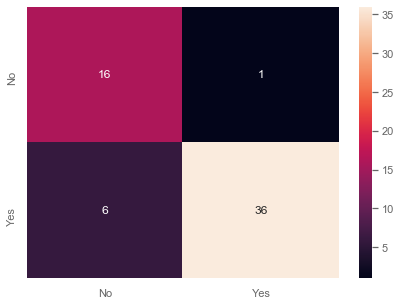

In [40]:
from sklearn.metrics import confusion_matrix
y_prediction = rfcl.predict(park_data_test_X)
print(rfcl.score(park_data_test_X, park_data_test_Y))
cm=confusion_matrix(park_data_test_Y, y_prediction,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

# Compare all the models (minimum 5) and pick the best one among them 

In [41]:
# Accuracy of Logistic Regression model : 81.3%
# Accuracy of KNN Model :                 93.2%
# Accuracy of Naive bayes Model:          64.41
# Stacking model:                         91.5%
# Random Forest Model Accuracy:           88.1%

# Of all the above ones KNN algorithm gave the maximum accuracy so it is the best model